# **라이브러리 불러오기**

In [350]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [351]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

# **[데이터 살펴보기]**

In [352]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [353]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [354]:
train.shape

(26457, 20)

In [355]:
test.shape

(10000, 19)

In [356]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

# **[데이터 전처리]**

**(주의) train data에 해준 그대로 test data 전처리**

## **1. 결측치 제거** 

In [357]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [358]:
train[train['occyp_type'].isnull()]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0


In [359]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [360]:
train['occyp_type'] = train['occyp_type'].fillna('NaN')
test['occyp_type'] = test['occyp_type'].fillna('NaN')

In [361]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['occyp_type'] = le.fit_transform(train['occyp_type'])

In [362]:
le.classes_

array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
       'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
       'NaN', 'Private service staff', 'Realty agents', 'Sales staff',
       'Secretaries', 'Security staff', 'Waiters/barmen staff'],
      dtype=object)

In [363]:
test['occyp_type'] = le.transform(test['occyp_type'])
test['occyp_type']

0       12
1        3
2        8
3        4
4       10
        ..
9995     0
9996     8
9997    11
9998    12
9999     8
Name: occyp_type, Length: 10000, dtype: int64

In [364]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,12,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,8,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,10,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,15,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,10,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,3,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,12,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,3,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,8,1.0,-59.0,2.0


In [365]:
# train=train.drop('occyp_type', axis=1)
# test=test.drop('occyp_type', axis=1)

## **2. Binary variables**

In [366]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')

print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')


print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')


print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


### **Type**

In [367]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [368]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
# train['income_total']=label_encoder.fit_transform(train['income_total'])
# test['income_total']=label_encoder.fit_transform(test['income_total'])

In [369]:
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,12,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,8,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,10,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,15,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,10,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,-12079,-1984,1,0,0,0,3,4.0,-2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,-15291,-2475,1,0,0,0,12,2.0,-47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,-10082,-2015,1,0,0,0,3,2.0,-25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,-10145,-107,1,0,0,0,8,1.0,-59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,365243,1,0,1,0,12,2.0,-60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,-18964,-8671,1,0,1,0,3,2.0,-36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,-15887,-217,1,1,1,0,8,2.0,-40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,-19270,-2531,1,1,0,0,4,2.0,-41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,-17822,-9385,1,1,0,0,10,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,-18593,-5434,1,1,1,0,0,2.0,-19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,-10886,-1315,1,1,0,0,8,2.0,-34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,-21016,-14018,1,0,0,0,11,2.0,-55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,-16541,-1085,1,0,1,0,12,2.0,-33.0


## **4. Minus continuous variable**

<AxesSubplot:xlabel='begin_month', ylabel='Count'>

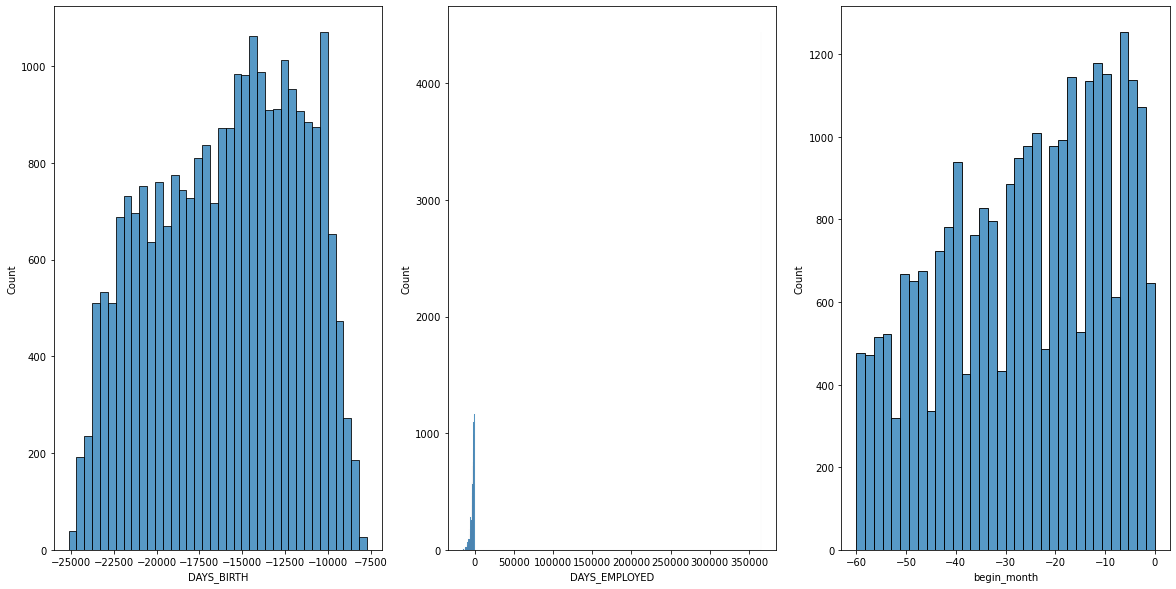

In [370]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.histplot(train['DAYS_BIRTH'], ax=axs[0])
sns.histplot(train['DAYS_EMPLOYED'], ax=axs[1])
sns.histplot(train['begin_month'], ax=axs[2])

In [371]:
col = ['DAYS_BIRTH', 'begin_month']
for i in col:
    train[i] = np.abs(train[i])
    test[i] = np.abs(test[i])
display(train,test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,-4709,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,11380,-1540,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,19087,-4434,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,15088,-2092,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,-2105,1,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,12079,-1984,1,0,0,0,3,4.0,2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,15291,-2475,1,0,0,0,12,2.0,47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,10082,-2015,1,0,0,0,3,2.0,25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,10145,-107,1,0,0,0,8,1.0,59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,365243,1,0,1,0,12,2.0,60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,-8671,1,0,1,0,3,2.0,36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,-217,1,1,1,0,8,2.0,40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,-2531,1,1,0,0,4,2.0,41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,-9385,1,1,0,0,10,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,-5434,1,1,1,0,0,2.0,19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,-1315,1,1,0,0,8,2.0,34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,-14018,1,0,0,0,11,2.0,55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,-1085,1,0,1,0,12,2.0,33.0


# DAYS_EMPLOYED
If days_employed > 0, consider the person is unemployed.

In [372]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x:0 if x>0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x:0 if x>0 else x)
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,-4709,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,11380,-1540,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,19087,-4434,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,15088,-2092,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,-2105,1,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,12079,-1984,1,0,0,0,3,4.0,2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,15291,-2475,1,0,0,0,12,2.0,47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,10082,-2015,1,0,0,0,3,2.0,25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,10145,-107,1,0,0,0,8,1.0,59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,0,1,0,1,0,12,2.0,60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,-8671,1,0,1,0,3,2.0,36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,-217,1,1,1,0,8,2.0,40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,-2531,1,1,0,0,4,2.0,41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,-9385,1,1,0,0,10,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,-5434,1,1,1,0,0,2.0,19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,-1315,1,1,0,0,8,2.0,34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,-14018,1,0,0,0,11,2.0,55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,-1085,1,0,1,0,12,2.0,33.0


# Negative values to positive values

In [373]:
train['DAYS_EMPLOYED'] = np.abs(train['DAYS_EMPLOYED'])
test['DAYS_EMPLOYED'] = np.abs(test['DAYS_EMPLOYED'])
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,4709,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,11380,1540,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,19087,4434,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,15088,2092,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,2105,1,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,12079,1984,1,0,0,0,3,4.0,2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,15291,2475,1,0,0,0,12,2.0,47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,10082,2015,1,0,0,0,3,2.0,25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,10145,107,1,0,0,0,8,1.0,59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,0,1,0,1,0,12,2.0,60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,8671,1,0,1,0,3,2.0,36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,1,0,8,2.0,40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,1,0,0,4,2.0,41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,1,0,0,10,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,1,0,0,2.0,19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,1,0,0,8,2.0,34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,14018,1,0,0,0,11,2.0,55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,1085,1,0,1,0,12,2.0,33.0


# Data visualisation

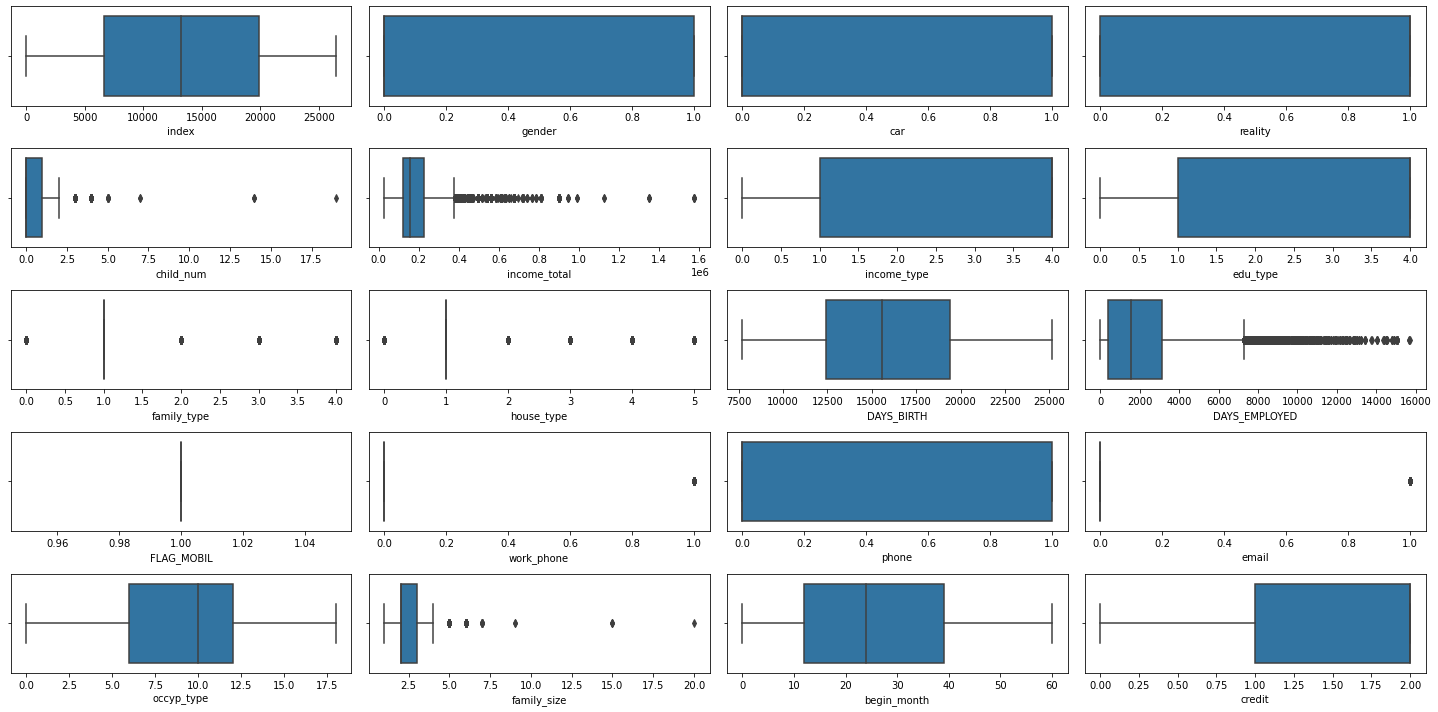

In [374]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20,10))
index = 0
axs = axs.flatten()
for col in train.columns:
    sns.boxplot(train[col], ax=axs[index])
    index += 1
plt.tight_layout()

In [375]:
#outlier
train[train['child_num'] > 5]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
8462,8462,1,1,1,14,225000.0,4,4,2,1,17754,1689,1,0,0,0,4,15.0,7.0,2.0
9021,9021,1,1,1,14,225000.0,4,4,2,1,17754,1689,1,0,0,0,4,15.0,58.0,2.0
10731,10731,0,0,1,19,112500.0,4,4,3,1,11057,1853,1,1,1,0,18,20.0,5.0,2.0
25313,25313,0,0,0,7,157500.0,4,4,1,1,13827,1649,1,1,1,0,1,9.0,26.0,2.0
25390,25390,1,1,1,14,225000.0,4,4,2,1,17754,1689,1,0,0,0,4,15.0,43.0,2.0
25638,25638,0,0,0,7,157500.0,4,4,1,1,13827,1649,1,1,1,0,1,9.0,31.0,2.0


In [376]:
train = train[train['child_num'] <= 5]
test = test[test['child_num'] <= 5]
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,4709,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,11380,1540,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,19087,4434,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,15088,2092,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,2105,1,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,12079,1984,1,0,0,0,3,4.0,2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,15291,2475,1,0,0,0,12,2.0,47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,10082,2015,1,0,0,0,3,2.0,25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,10145,107,1,0,0,0,8,1.0,59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,0,1,0,1,0,12,2.0,60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,8671,1,0,1,0,3,2.0,36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,1,0,8,2.0,40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,1,0,0,4,2.0,41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,1,0,0,10,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,1,0,0,2.0,19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,1,0,0,8,2.0,34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,14018,1,0,0,0,11,2.0,55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,1085,1,0,1,0,12,2.0,33.0


In [377]:
#drop unnecessary columns
train = train.drop(['index', 'FLAG_MOBIL'], axis=1)
test = test.drop(['index', 'FLAG_MOBIL'], axis=1)
display(train, test)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,12,2.0,6.0,1.0
1,0,0,1,1,247500.0,0,4,0,1,11380,1540,0,0,1,8,3.0,5.0,1.0
2,1,1,1,0,450000.0,4,1,1,1,19087,4434,0,1,0,10,2.0,22.0,2.0
3,0,0,1,0,202500.0,0,4,1,1,15088,2092,0,1,0,15,2.0,37.0,0.0
4,0,1,1,0,157500.0,2,1,1,1,15037,2105,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,1984,0,0,0,3,4.0,2.0,1.0
26453,0,0,1,1,180000.0,4,1,2,1,15291,2475,0,0,0,12,2.0,47.0,2.0
26454,0,1,0,0,292500.0,4,4,0,5,10082,2015,0,0,0,3,2.0,25.0,2.0
26455,1,0,1,0,171000.0,4,2,3,1,10145,107,0,0,0,8,1.0,59.0,2.0


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,1,0,0,112500.0,1,4,0,1,21990,0,0,1,0,12,2.0,60.0
1,0,0,1,0,135000.0,2,1,1,1,18964,8671,0,1,0,3,2.0,36.0
2,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,0,8,2.0,40.0
3,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,0,0,4,2.0,41.0
4,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,0,0,10,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,0,0,2.0,19.0
9996,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,0,0,8,2.0,34.0
9997,0,0,1,0,292500.0,4,4,1,1,21016,14018,0,0,0,11,2.0,55.0
9998,0,1,0,0,180000.0,0,4,1,1,16541,1085,0,1,0,12,2.0,33.0


In [378]:
#age
train['age'] = train['DAYS_BIRTH'] // 365 + round((train['DAYS_BIRTH'] % 365) / 365, 1)
test['age'] = test['DAYS_BIRTH'] // 365 + round((test['DAYS_BIRTH'] % 365) / 365, 1)

#months, week of birth
train['m_DAYS_BIRTH'] = train['DAYS_BIRTH'] // 30 % 12
test['m_DAYS_BIRTH'] = test['DAYS_BIRTH'] // 30 % 12
train['w_DAYS_BIRTH'] = train['DAYS_BIRTH'] // 7 % 4
test['w_DAYS_BIRTH'] = test['DAYS_BIRTH'] // 7 % 4
display(train, test)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,m_DAYS_BIRTH,w_DAYS_BIRTH
0,0,0,0,0,202500.0,0,1,1,2,13899,...,0,0,0,12,2.0,6.0,1.0,38.1,7,1
1,0,0,1,1,247500.0,0,4,0,1,11380,...,0,0,1,8,3.0,5.0,1.0,31.2,7,1
2,1,1,1,0,450000.0,4,1,1,1,19087,...,0,1,0,10,2.0,22.0,2.0,52.3,0,2
3,0,0,1,0,202500.0,0,4,1,1,15088,...,0,1,0,15,2.0,37.0,0.0,41.3,10,3
4,0,1,1,0,157500.0,2,1,1,1,15037,...,0,0,0,10,2.0,26.0,2.0,41.2,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,...,0,0,0,3,4.0,2.0,1.0,33.1,6,1
26453,0,0,1,1,180000.0,4,1,2,1,15291,...,0,0,0,12,2.0,47.0,2.0,41.9,5,0
26454,0,1,0,0,292500.0,4,4,0,5,10082,...,0,0,0,3,2.0,25.0,2.0,27.6,0,0
26455,1,0,1,0,171000.0,4,2,3,1,10145,...,0,0,0,8,1.0,59.0,2.0,27.8,2,1


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,age,m_DAYS_BIRTH,w_DAYS_BIRTH
0,1,1,0,0,112500.0,1,4,0,1,21990,0,0,1,0,12,2.0,60.0,60.2,1,1
1,0,0,1,0,135000.0,2,1,1,1,18964,8671,0,1,0,3,2.0,36.0,52.0,8,1
2,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,0,8,2.0,40.0,43.5,1,1
3,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,0,0,4,2.0,41.0,52.8,6,0
4,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,0,0,10,2.0,8.0,48.8,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,0,0,2.0,19.0,50.9,7,0
9996,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,0,0,8,2.0,34.0,29.8,2,3
9997,0,0,1,0,292500.0,4,4,1,1,21016,14018,0,0,0,11,2.0,55.0,57.6,4,2
9998,0,1,0,0,180000.0,0,4,1,1,16541,1085,0,1,0,12,2.0,33.0,45.3,11,3


In [379]:
#year, month, week of employed
train['y_DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'] // 365
train['m_DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'] // 30 % 12
train['w_DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'] // 7 % 4
test['y_DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'] // 365
test['m_DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'] // 30 % 12
test['w_DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'] // 7 % 4
display(train, test)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,occyp_type,family_size,begin_month,credit,age,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED
0,0,0,0,0,202500.0,0,1,1,2,13899,...,12,2.0,6.0,1.0,38.1,7,1,12,0,0
1,0,0,1,1,247500.0,0,4,0,1,11380,...,8,3.0,5.0,1.0,31.2,7,1,4,3,0
2,1,1,1,0,450000.0,4,1,1,1,19087,...,10,2.0,22.0,2.0,52.3,0,2,12,3,1
3,0,0,1,0,202500.0,0,4,1,1,15088,...,15,2.0,37.0,0.0,41.3,10,3,5,9,2
4,0,1,1,0,157500.0,2,1,1,1,15037,...,10,2.0,26.0,2.0,41.2,9,0,5,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,...,3,4.0,2.0,1.0,33.1,6,1,5,6,3
26453,0,0,1,1,180000.0,4,1,2,1,15291,...,12,2.0,47.0,2.0,41.9,5,0,6,10,1
26454,0,1,0,0,292500.0,4,4,0,5,10082,...,3,2.0,25.0,2.0,27.6,0,0,5,7,3
26455,1,0,1,0,171000.0,4,2,3,1,10145,...,8,1.0,59.0,2.0,27.8,2,1,0,3,3


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,email,occyp_type,family_size,begin_month,age,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED
0,1,1,0,0,112500.0,1,4,0,1,21990,...,0,12,2.0,60.0,60.2,1,1,0,0,0
1,0,0,1,0,135000.0,2,1,1,1,18964,...,0,3,2.0,36.0,52.0,8,1,23,1,2
2,0,0,1,0,69372.0,4,4,1,1,15887,...,0,8,2.0,40.0,43.5,1,1,0,7,3
3,1,1,0,0,112500.0,0,4,1,1,19270,...,0,4,2.0,41.0,52.8,6,0,6,0,1
4,0,1,1,0,225000.0,2,1,1,1,17822,...,0,10,2.0,8.0,48.8,6,2,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,4,2,1,1,18593,...,0,0,2.0,19.0,50.9,7,0,14,1,0
9996,1,1,1,0,202500.0,4,4,0,1,10886,...,0,8,2.0,34.0,29.8,2,3,3,7,3
9997,0,0,1,0,292500.0,4,4,1,1,21016,...,0,11,2.0,55.0,57.6,4,2,38,11,2
9998,0,1,0,0,180000.0,0,4,1,1,16541,...,0,12,2.0,33.0,45.3,11,3,2,0,3


In [380]:
#income per family member
train['income_per_member'] = train['income_total'] / train['family_size']
test['income_per_member'] = test['income_total'] / test['family_size']

In [381]:
#before employed
train['before_employed'] = train['DAYS_BIRTH'] - train['DAYS_EMPLOYED']
train['m_before_employed'] = train['before_employed'] // 30 % 12
train['w_before_employed'] = train['before_employed'] // 7 % 4
test['before_employed'] = test['DAYS_BIRTH'] - test['DAYS_EMPLOYED']
test['m_before_employed'] = test['before_employed'] // 30 % 12
test['w_before_employed'] = test['before_employed'] // 7 % 4

In [382]:
#ability
train['ability'] = train['income_total'] / (train['DAYS_BIRTH'] + train['DAYS_EMPLOYED'])
test['ability'] = test['income_total'] / (test['DAYS_BIRTH'] + test['DAYS_EMPLOYED'])

In [383]:
display(train, test)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,0,0,0,0,202500.0,0,1,1,2,13899,...,7,1,12,0,0,101250.0,9190,6,0,10.882416
1,0,0,1,1,247500.0,0,4,0,1,11380,...,7,1,4,3,0,82500.0,9840,4,1,19.156347
2,1,1,1,0,450000.0,4,1,1,1,19087,...,0,2,12,3,1,225000.0,14653,8,1,19.131840
3,0,0,1,0,202500.0,0,4,1,1,15088,...,10,3,5,9,2,101250.0,12996,1,0,11.786962
4,0,1,1,0,157500.0,2,1,1,1,15037,...,9,0,5,10,0,78750.0,12932,11,3,9.187959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,...,6,1,5,6,3,56250.0,10095,0,2,15.999431
26453,0,0,1,1,180000.0,4,1,2,1,15291,...,5,0,6,10,1,90000.0,12816,7,2,10.131712
26454,0,1,0,0,292500.0,4,4,0,5,10082,...,0,0,5,7,3,146250.0,8067,4,0,24.179549
26455,1,0,1,0,171000.0,4,2,3,1,10145,...,2,1,0,3,3,171000.0,10038,10,2,16.679672


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,1,1,0,0,112500.0,1,4,0,1,21990,...,1,1,0,0,0,56250.0,21990,1,1,5.115962
1,0,0,1,0,135000.0,2,1,1,1,18964,...,8,1,23,1,2,67500.0,10293,7,2,4.885109
2,0,0,1,0,69372.0,4,4,1,1,15887,...,1,1,0,7,3,34686.0,15670,6,2,4.307750
3,1,1,0,0,112500.0,0,4,1,1,19270,...,6,0,6,0,1,56250.0,16739,5,3,5.160314
4,0,1,1,0,225000.0,2,1,1,1,17822,...,6,2,25,0,0,112500.0,8437,5,1,8.269931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,4,2,1,1,18593,...,7,0,14,1,0,101250.0,13159,6,3,8.428018
9996,1,1,1,0,202500.0,4,4,0,1,10886,...,2,3,3,7,3,101250.0,9571,7,3,16.597000
9997,0,0,1,0,292500.0,4,4,1,1,21016,...,4,2,38,11,2,146250.0,6998,5,3,8.349032
9998,0,1,0,0,180000.0,0,4,1,1,16541,...,11,3,2,0,3,90000.0,15456,11,0,10.212187


<AxesSubplot:>

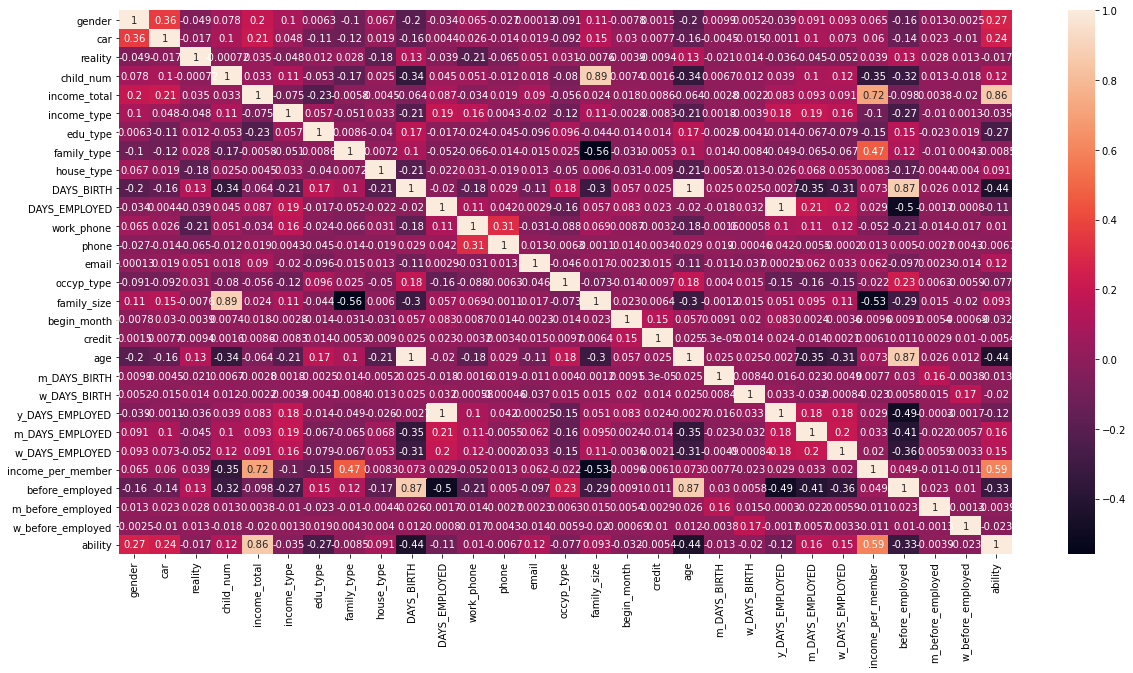

In [384]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True)

In [385]:
#drop multicollinearity cols
train.drop(['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)
test.drop(['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)
display(train, test)

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,0,0,0,202500.0,0,1,1,2,0,0,...,7,1,12,0,0,101250.0,9190,6,0,10.882416
1,0,0,1,247500.0,0,4,0,1,0,0,...,7,1,4,3,0,82500.0,9840,4,1,19.156347
2,1,1,1,450000.0,4,1,1,1,0,1,...,0,2,12,3,1,225000.0,14653,8,1,19.131840
3,0,0,1,202500.0,0,4,1,1,0,1,...,10,3,5,9,2,101250.0,12996,1,0,11.786962
4,0,1,1,157500.0,2,1,1,1,0,0,...,9,0,5,10,0,78750.0,12932,11,3,9.187959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,225000.0,2,4,1,1,0,0,...,6,1,5,6,3,56250.0,10095,0,2,15.999431
26453,0,0,1,180000.0,4,1,2,1,0,0,...,5,0,6,10,1,90000.0,12816,7,2,10.131712
26454,0,1,0,292500.0,4,4,0,5,0,0,...,0,0,5,7,3,146250.0,8067,4,0,24.179549
26455,1,0,1,171000.0,4,2,3,1,0,0,...,2,1,0,3,3,171000.0,10038,10,2,16.679672


,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,1,1,0,112500.0,1,4,0,1,0,1,...,1,1,0,0,0,56250.0,21990,1,1,5.115962
1,0,0,1,135000.0,2,1,1,1,0,1,...,8,1,23,1,2,67500.0,10293,7,2,4.885109
2,0,0,1,69372.0,4,4,1,1,1,1,...,1,1,0,7,3,34686.0,15670,6,2,4.307750
3,1,1,0,112500.0,0,4,1,1,1,0,...,6,0,6,0,1,56250.0,16739,5,3,5.160314
4,0,1,1,225000.0,2,1,1,1,1,0,...,6,2,25,0,0,112500.0,8437,5,1,8.269931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,202500.0,4,2,1,1,1,1,...,7,0,14,1,0,101250.0,13159,6,3,8.428018
9996,1,1,1,202500.0,4,4,0,1,1,0,...,2,3,3,7,3,101250.0,9571,7,3,16.597000
9997,0,0,1,292500.0,4,4,1,1,0,0,...,4,2,38,11,2,146250.0,6998,5,3,8.349032
9998,0,1,0,180000.0,0,4,1,1,0,1,...,11,3,2,0,3,90000.0,15456,11,0,10.212187


In [386]:
train.skew()

gender               0.718002
car                  0.495700
reality             -0.742084
income_total         2.659126
income_type         -0.295432
edu_type            -0.859202
family_type          1.286469
house_type           3.316388
work_phone           1.319382
phone                0.903289
email                2.837989
occyp_type          -0.428439
family_size          0.875964
begin_month          0.290062
credit              -1.124043
age                  0.185915
m_DAYS_BIRTH         0.016542
w_DAYS_BIRTH         0.002526
y_DAYS_EMPLOYED      1.817268
m_DAYS_EMPLOYED      0.204559
w_DAYS_EMPLOYED      0.293755
income_per_member    2.589302
before_employed      0.559431
m_before_employed    0.017120
w_before_employed   -0.023011
ability              2.773857
dtype: float64

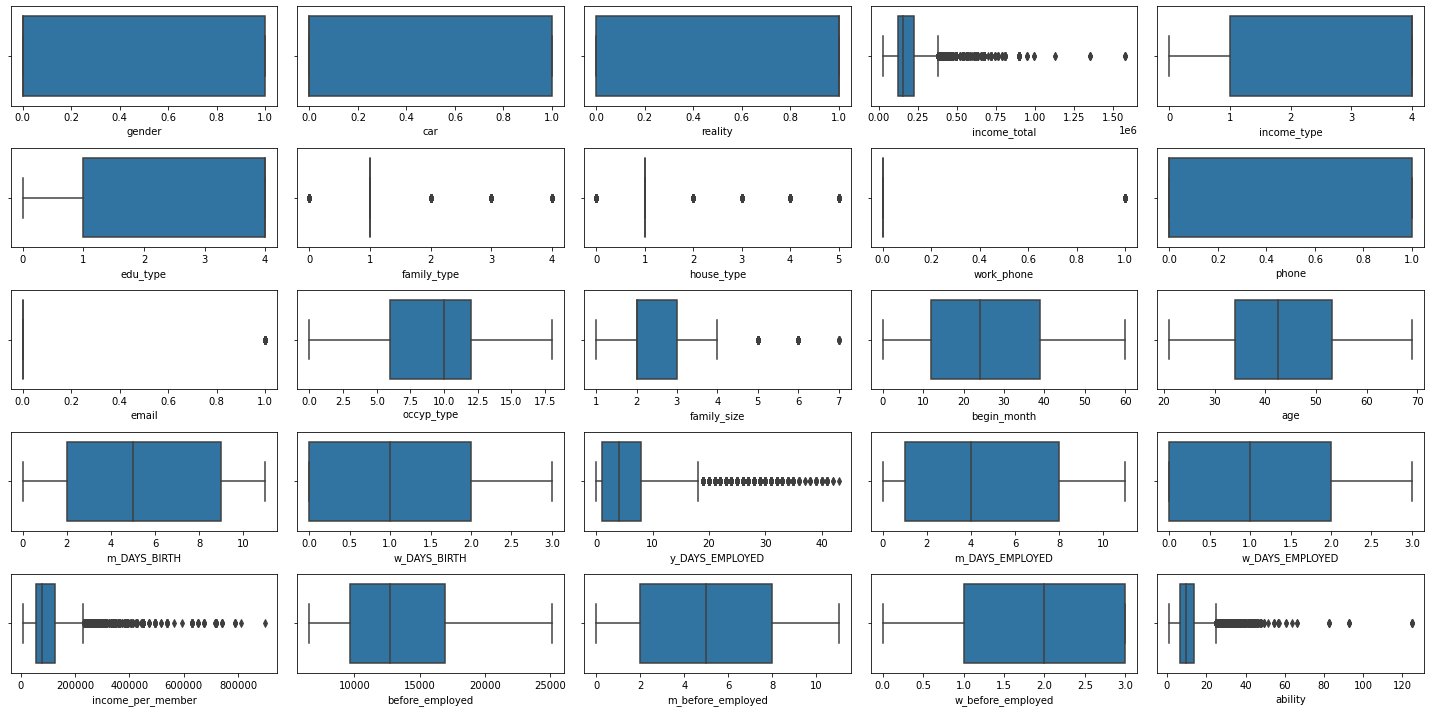

In [388]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20,10))
index = 0
axs = axs.flatten()
for col in train.columns:
    if col != 'credit':
        sns.boxplot(train[col], ax=axs[index])
        index += 1
plt.tight_layout()

0        12.218495
1        12.419166
2        13.017003
3        12.218495
4        11.967181
           ...    
26452    12.323856
26453    12.100712
26454    12.586220
26455    12.049419
26456    11.302204
Name: income_total, Length: 26451, dtype: float64


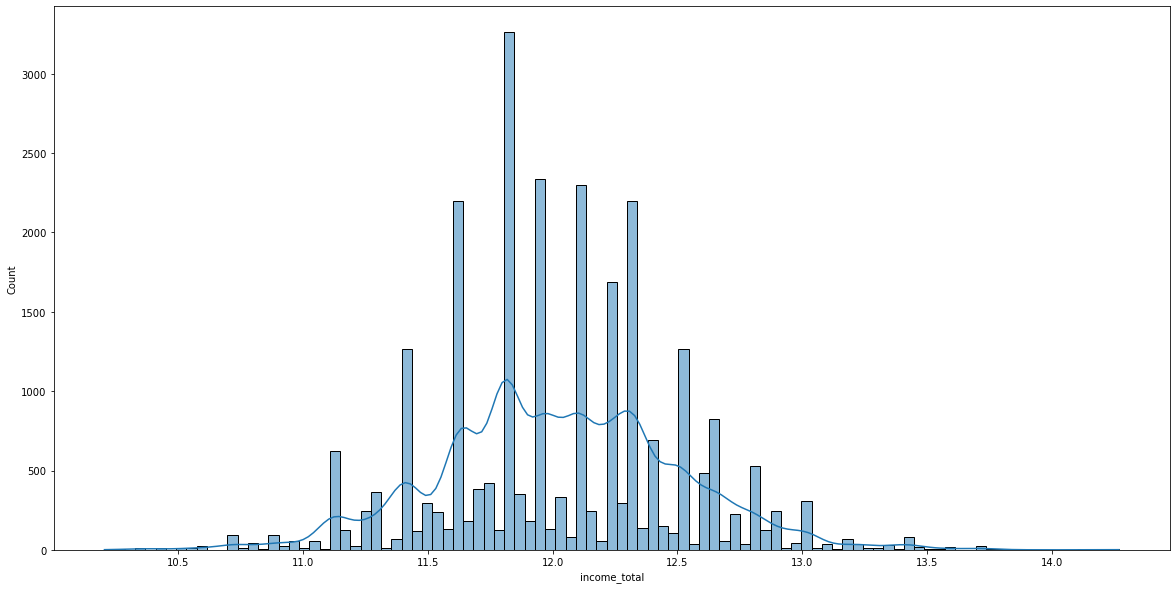

In [396]:
fig = plt.figure(figsize=(20,10))
sns.histplot(np.log(train['income_total']), kde=True)

<AxesSubplot:ylabel='Count'>

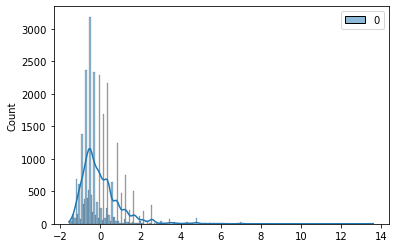

In [398]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(train['income_total'].values.reshape(-1,1))
sns.histplot(data, kde=True)

<AxesSubplot:ylabel='Count'>

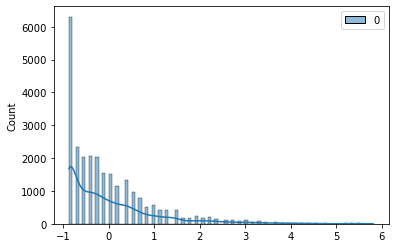

In [399]:
data = ss.fit_transform(train['y_DAYS_EMPLOYED'].values.reshape(-1,1))
sns.histplot(data, kde=True)

# **[데이터 모델링]**

In [28]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [29]:
print(train_x.shape, train_y.shape, test.shape)

(26457, 18) (26457, 1) (10000, 18)


In [ ]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit_transform(train_x, train_y, eval=)

In [31]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, log_loss
# from sklearn.metrics import f1_score
# # from tensorflow.keras.utils import to_categorical

# X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
#                                                     stratify=train_y, test_size=0.25,
#                                                     random_state = 10086)

# print("Train set: ")
# print(X_train.shape)
# print(y_train.shape)
# print("===========")
# print("Validation set: ")
# print(X_val.shape)
# print(y_val.shape)


# clf=RandomForestClassifier()
# clf.fit(X_train, y_train)
# y_pred=clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 18)
(19842, 1)
Validation set: 
(6615, 18)
(6615, 1)


In [ ]:
# from sklearn.model_selection import KFold, StratifiedKFold

# def run_kfold(clf):
#     folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
#     outcomes=[]
#     sub=np.zeros((test_x.shape[0], 3))  
#     for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
#         X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
#         y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
#         clf.fit(X_train, y_train)
        
#         predictions=clf.predict_proba(X_val)
        
#         logloss=log_loss(to_categorical(y_val['credit']), predictions)
#         outcomes.append(logloss)
#         print(f"FOLD {n_fold} : logloss:{logloss}")
        
#         sub+=clf.predict_proba(test_x)
        
        
#     mean_outcome=np.mean(outcomes)
    
#     print("Mean:{}".format(mean_outcome))
#     return sub/folds.n_splits

# my_submission = run_kfold(clf)

FOLD 0 : logloss:1.0392087466852982
FOLD 1 : logloss:1.0279703352830671
FOLD 2 : logloss:1.1041397256249195
FOLD 3 : logloss:1.0041502045151132
FOLD 4 : logloss:1.073084268697861
Mean:1.049710656161252


In [ ]:
my_submission

array([[0.104, 0.214, 0.682],
       [0.078, 0.194, 0.728],
       [0.062, 0.224, 0.714],
       ...,
       [0.054, 0.11 , 0.836],
       [0.118, 0.41 , 0.472],
       [0.12 , 0.394, 0.486]])

In [ ]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [ ]:
submission.loc[:,1:]=my_submission

In [ ]:
submission

,index,0,1,2
0,26457,0.104,0.214,0.682
1,26458,0.078,0.194,0.728
2,26459,0.062,0.224,0.714
3,26460,0.148,0.194,0.658
4,26461,0.134,0.362,0.504
...,...,...,...,...
9995,36452,0.118,0.354,0.528
9996,36453,0.156,0.368,0.476
9997,36454,0.054,0.110,0.836
9998,36455,0.118,0.410,0.472


In [ ]:
os.chdir('../baseline')

In [ ]:
submission.to_csv('baseline_submission.csv', index=False)